# 3F8 Inference: Coursework

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cbl-cambridge/3F8-Lab/blob/main/coursework.ipynb)

This is the auxiliary code for the 3F8 coursework. Some parts are missing and should be completed by the student. These are marked with `XXX`.

## How to Use This Notebook

This notebook is divided into **cells** containing either code or text. To work through the coursework, run each code cell from top to bottom using these keyboard shortcuts:

- **Shift+Enter** — Run the current cell and move to the next one
- **Ctrl+Enter** — Run the current cell and stay on it (useful for re-running a cell after changing a parameter)

Cells can be run in any order, but each cell may depend on variables or functions defined in earlier cells. When working through the notebook for the first time, it is simplest to run cells from top to bottom. If you go back and change a cell, make sure to re-run it and any later cells that depend on it.

You can use the **+ Code** / **+ Text** buttons that appear below each cell when you hover to add a new cell (useful for experimenting or adding your own notes).

## Setup

The coursework requires two data files: `X.txt` and `y.txt`.

**Option 1 (recommended):** Run the cell below to download them automatically from GitHub.

In [25]:
import urllib.request

base_url = "https://raw.githubusercontent.com/cbl-cambridge/3F8-Lab/main/"
for filename in ["X.txt", "y.txt"]:
    urllib.request.urlretrieve(base_url + filename, filename)
    print(f"Downloaded {filename}")

Downloaded X.txt
Downloaded y.txt


**Option 2:** Upload the files manually. In Google Colab:
1. Click the **files icon** (folder) in the left sidebar
2. Click the **upload icon** at the top of the file browser
3. Select `X.txt` and `y.txt` from your computer

<img src="https://raw.githubusercontent.com/cbl-cambridge/3F8-Lab/main/Colab%20Upload%20Instructions.png" width="300">

## Load and Visualise the Data

In [26]:
# We load the data

import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

In [27]:
# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]

In [28]:
# We plot the data

import matplotlib.pyplot as plt

##
# Function that plots the points in 2D together with their labels
#
# Inputs:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: 2D matrices with the x and y coordinates of the points shown in the plot
#

def plot_data_internal(X, y):
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy

##
# Function that plots the data without returning anything by calling "plot_data_internal".
#
# Input:
#
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
#
# Output: Nothing.
#

def plot_data(X, y):
    xx, yy = plot_data_internal(X, y)
    plt.show()

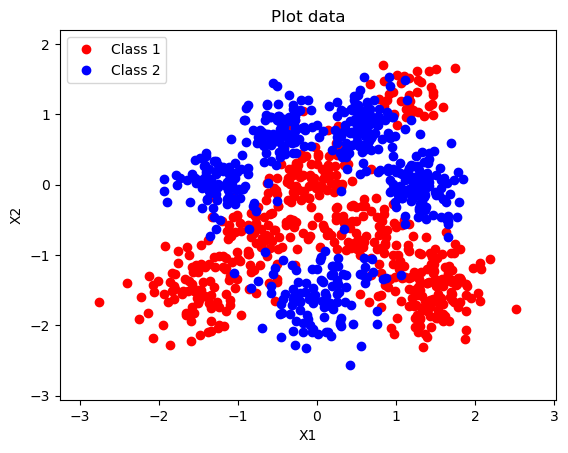

In [29]:
plot_data(X, y)

## Train/Test Split and Model Functions

In [30]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]

In [31]:
# The logistic function

def logistic(x): return 1.0 / (1.0 + np.exp(-x))

##
# Function that makes predictions with a logistic classifier
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# w: vector of model parameters
#
# Output: The predictions of the logistic classifier
#

def predict(X_tilde, w): return logistic(np.dot(X_tilde, w))


##
# Function that computes the average loglikelihood of the logistic classifier on some data.
#
# Input:
#
# X_tile: matrix of input features (with a constant 1 appended to the left) 
#         for which to make predictions
# y: vector of binary output labels 
# w: vector of model parameters
#
# Output: The average loglikelihood
#

def compute_average_ll(X_tilde, y, w):
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))

##
# Function that expands a matrix of input features by adding a column equal to 1.
#
# Input:
#
# X: matrix of input features.
#
# Output: Matrix x_tilde with one additional constant column equal to 1 added.
#

def get_x_tilde(X): return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)

## Training the Logistic Classifier

In [32]:
##
# Function that finds the model parameters by optimising the likelihood using gradient descent
#
# Input:
#
# X_tile_train: matrix of training input features (with a constant 1 appended to the left) 
# y_train: vector of training binary output labels 
# X_tile_test: matrix of test input features (with a constant 1 appended to the left) 
# y_test: vector of test binary output labels 
# alpha: step_size_parameter for the gradient based optimisation
# n_steps: the number of steps of gradient based optimisation
#
# Output: 
# 
# 1 - Vector of model parameters w 
# 2 - Vector with average log-likelihood values obtained on the training set
# 3 - Vector with average log-likelihood values obtained on the test set
#

def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    w = np.random.randn(X_tilde_train.shape[ 1 ])
    ll_train = np.zeros(n_steps)
    ll_test = np.zeros(n_steps)
    for i in range(n_steps):
        sigmoid_value = predict(X_tilde_train, w)
        
        log_likelihood_gradient = np.dot(X_tilde_train.T, (y_train - sigmoid_value)) / X_tilde_train.shape[ 0 ]

        w = w + alpha * log_likelihood_gradient

        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w)
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w)
        print(ll_train[ i ], ll_test[ i ])

    return w, ll_train, ll_test

In [33]:
# We train the classifier

alpha = 0.3 # XXX Learning rate for gradient-based optimisation. To be completed by the student
n_steps = 1000 # XXX Number of steps of gradient-based optimisation. To be completed by the student

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-0.8833059035383005 -0.8508678164340827
-0.8440440478653266 -0.8172948064473624
-0.8101525142134389 -0.7881245750440911
-0.7812605947477519 -0.7630570831181696
-0.7568973102682279 -0.7417140138181033
-0.7365313332776775 -0.7236693598410975
-0.7196132267674794 -0.7084822517818025
-0.7056119011604578 -0.695725636975571
-0.6940404856326426 -0.6850068853540107
-0.6844706561894518 -0.6759794027663074
-0.6765372246912906 -0.6683465514177007
-0.6699359607074719 -0.6618601591740443
-0.6644175521382343 -0.6563158958604827
-0.6597799388315677 -0.6515472912682047
-0.6558604668029535 -0.6474195579614315
-0.6525286586484899 -0.6438238667217958
-0.649679946283671 -0.6406723632372551
-0.647230442117442 -0.6378939965530634
-0.6451126833599772 -0.6354311141192516
-0.6432722235086641 -0.6332367275167003
-0.6416649299185664 -0.6312723391476331
-0.6402548540409535 -0.6295062251419156
-0.6390125581195859 -0.6279120827160845
-0.6379138017410635 -0.6264679654095981
-0.6369385101982393 -0.625155444164001
-0.6

## Plotting the Results

In [34]:
##
# Function that plots the average log-likelihood returned by "fit_w"
#
# Input:
#
# ll: vector with log-likelihood values
#
# Output: Nothing
#

def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.show()

def plot_ll_train_test(ll_train, ll_test):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll_train) + 2)
    plt.ylim(min(min(ll_train), min(ll_test)) - 0.1, max(max(ll_train), max(ll_test)) + 0.1)
    ax.plot(np.arange(1, len(ll_train) + 1), ll_train, 'r-', label = 'Train')
    ax.plot(np.arange(1, len(ll_test) + 1), ll_test, 'b-', label = 'Test')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    plt.show()

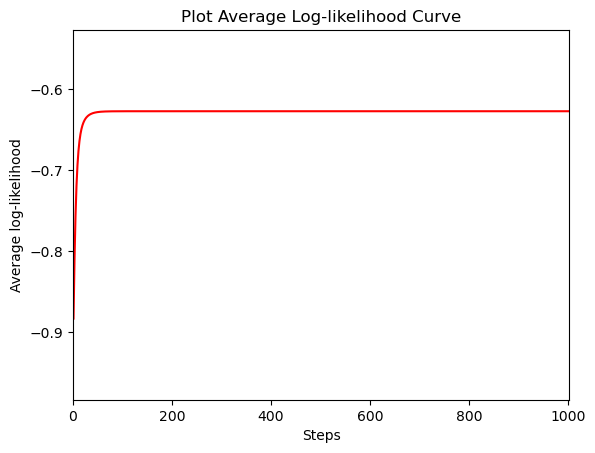

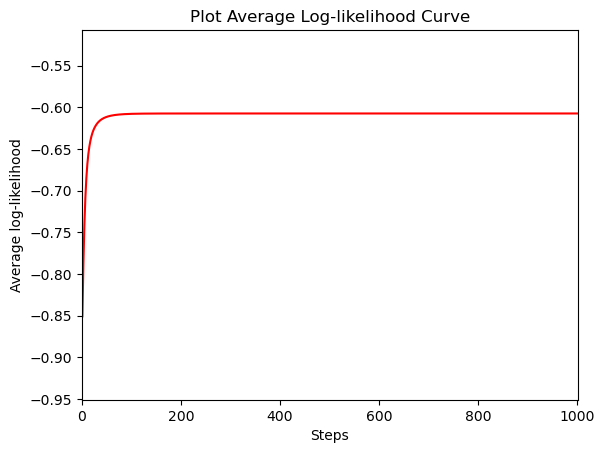

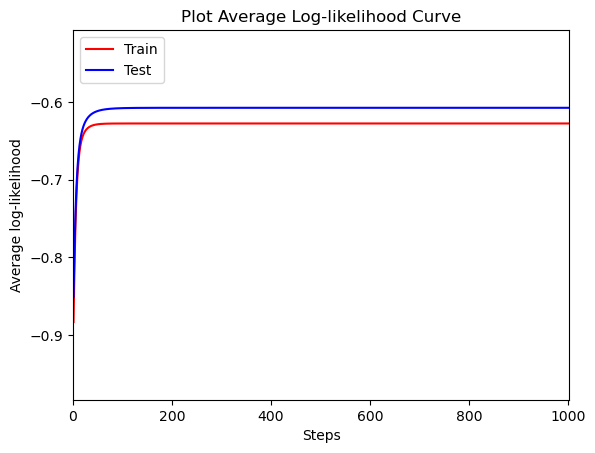

In [35]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)
plot_ll_train_test(ll_train, ll_test)

In [36]:
##
# Function that plots the predictive probabilities of the logistic classifier
#
# Input:
#
# X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)
# y: 1d array with the class labels (0 or 1) for the data
# w: parameter vector
# map_inputs: function that expands the original 2D inputs using basis functions.
#
# Output: Nothing.
#

def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()

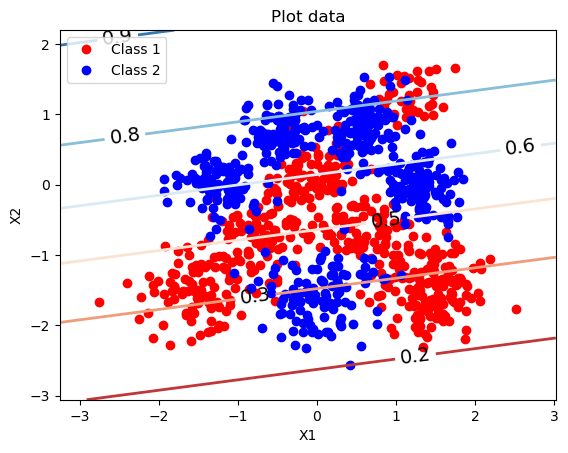

In [37]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w)

Confusion Matrix:


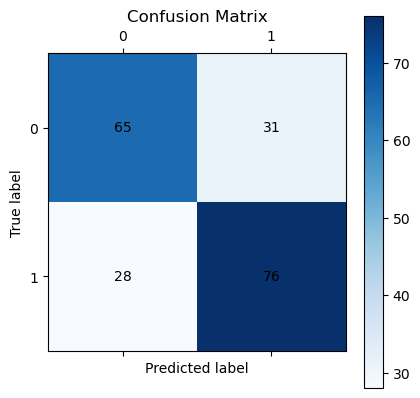

In [38]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = predict(X_tilde_test, w) >= 0.5
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
# have numbers displayed in the confusion matrix
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, str(z), ha='center', va='center')
plt.show()

## Non-Linear Feature Expansion with Radial Basis Functions

In [39]:
##
# Function that replaces initial input features by evaluating Gaussian basis functions
# on a grid of points
#
# Inputs:
#
# l: hyper-parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
#
# Output: Feature matrix with the evaluations of the Gaussian basis functions.
#

def evaluate_basis_functions(l, X, Z):
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

In [40]:
# We expand the data

l = 0.5 # XXX Width of the Gaussian basis funcction. To be completed by the student

X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

In [41]:
# We train the new classifier on the feature expanded inputs

alpha = 0.3# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
n_steps = 1000 # XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

-2.6425893117277712 -2.5856017590725195
-2.3330315577207346 -2.2968802391480305
-2.0835843366475464 -2.061339376730439
-1.8754509715759706 -1.8647274682788089
-1.6958495305141759 -1.696257841842957
-1.5379441630303137 -1.5491879742245231
-1.3986085847595724 -1.4196679786330444
-1.2761998963588177 -1.3053696347149646
-1.1691946460334586 -1.2045594810472304
-1.0758645347484146 -1.115767463292554
-0.9944785647273239 -1.037721865031451
-0.923439401785231 -0.9692450422094643
-0.8612987944647181 -0.9091752247006545
-0.8067704341092136 -0.8563850554671778
-0.7587448940185884 -0.8098333982999444
-0.7162831986508522 -0.768596818468067
-0.6785931929670224 -0.7318768677760346
-0.6450026512446542 -0.6989941754307327
-0.6149372598903383 -0.6693767133298709
-0.5879048749770754 -0.6425457511714905
-0.563484352497989 -0.6181015805162522
-0.5413169211029444 -0.5957104118836111
-0.5210987879393031 -0.5750931842551266
-0.5025743838492717 -0.5560164314939793
-0.4855300602817897 -0.5382849712798063
-0.4697

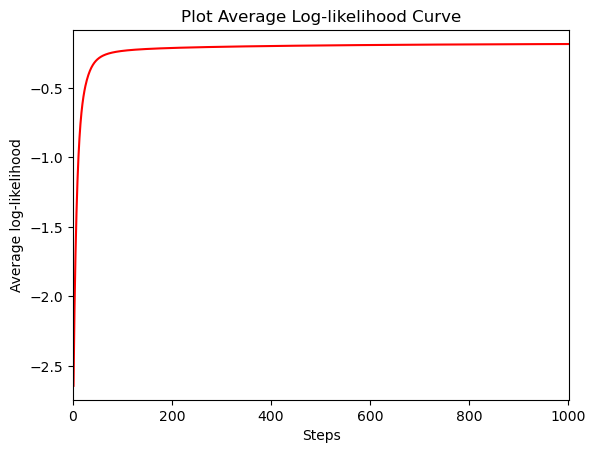

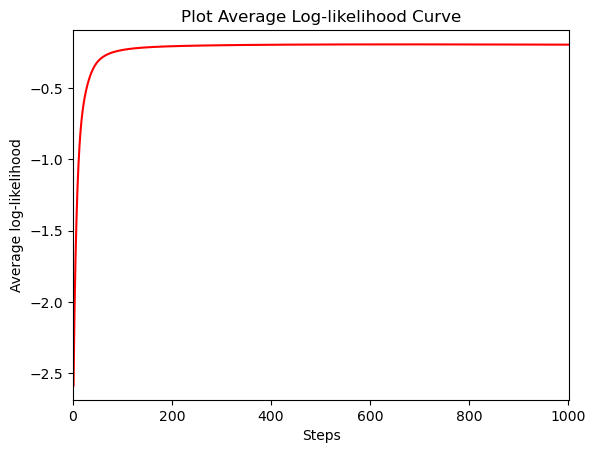

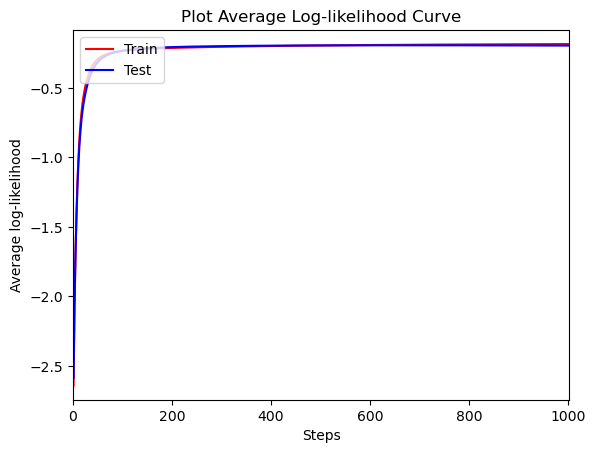

In [42]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)
plot_ll_train_test(ll_train, ll_test)

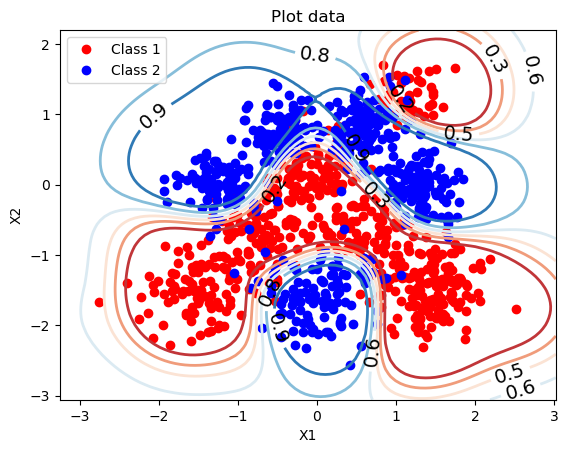

In [43]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))

Confusion Matrix:


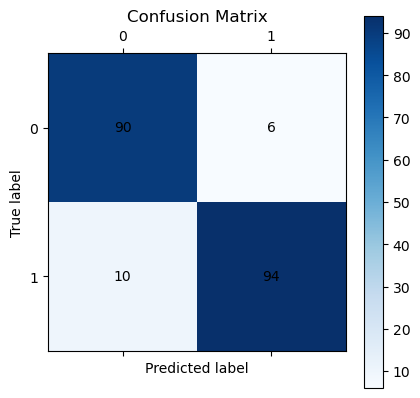

In [44]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = predict(X_tilde_test, w) >= 0.5
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
# have numbers displayed in the confusion matrix
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, str(z), ha='center', va='center')
plt.show()